In [14]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import re

In [15]:
#import json file into df
cooking_trainData = pd.read_json('E:/test/train.json')
cooking_trainData.head(20)

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli..."
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo..."
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por..."
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [16]:
cooking_trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [17]:
#Checking for missing values in train dataframe
cooking_trainData.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

# Cuisine

In [18]:
print("Total num of cuisines:", end = ' ')
print(cooking_trainData['cuisine'].nunique()) #total number of cuisines

#print("\nCount of each cuisine:")
#print(cooking_traindData['cuisine'].value_counts(ascending=True)) #number of cuisine

Total num of cuisines: 20


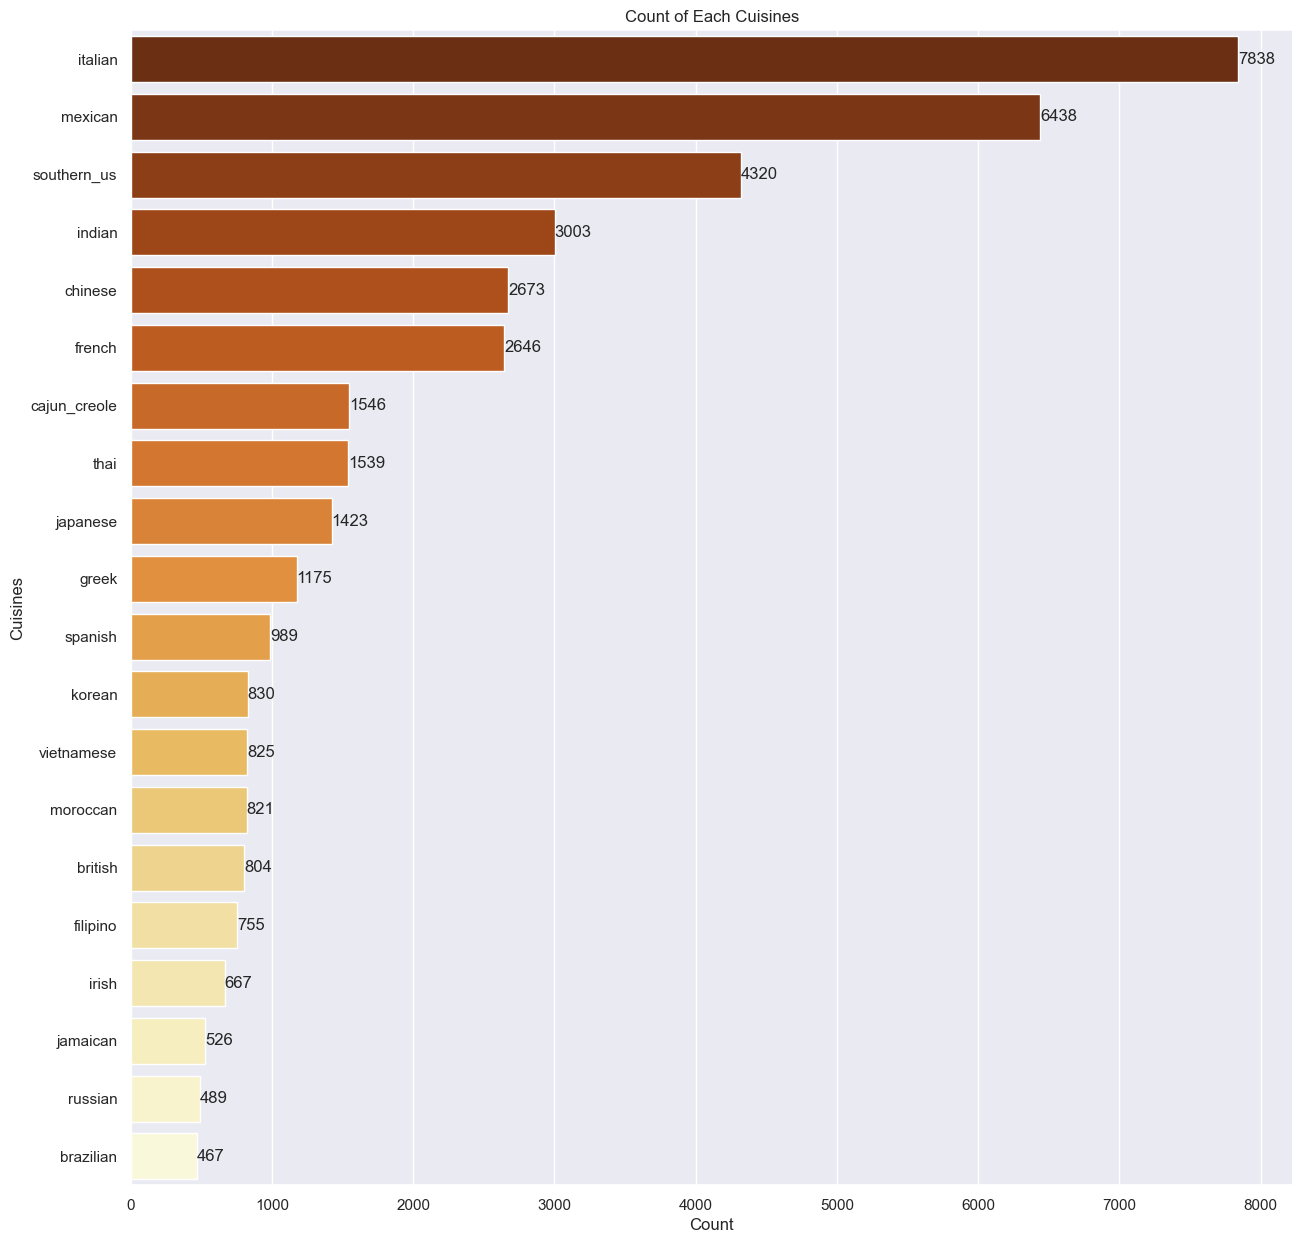

In [19]:
#Plot the count of each cuisines
count_cuisine = cooking_trainData['cuisine'].value_counts(ascending=False)

plt.figure(figsize=(15,15))

pal = sb.color_palette("YlOrBr", len(count_cuisine.values))
pal.reverse()
ax = sb.barplot(y = count_cuisine.index, x = count_cuisine.values, palette=np.array(pal))
ax.bar_label(ax.containers[0]) #show values on the graph

plt.title('Count of Each Cuisines')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cuisines', fontsize=12)
plt.show()

# Ingredients 

Create a cleaning function to clean the ingredients

In [20]:
def preprocess(ingredient):
    #Converting to lowercase
    #ingredients = [[x.lower() for x in y] for y in ingredients]
    ingredient = ingredient.lower()
    
    #Removing extra white spaces
    #ingredients = [[re.sub( '\s+', ' ', x).strip() for x in y] for y in ingredients]
    ingredient = re.sub( '\s+', ' ', ingredient).strip()
        
    #Removing numbers
    #ingredients = [[re.sub("\d+", "", x) for x in y] for y in ingredients]
    ingredient = re.sub( "\d+", "", ingredient).strip()
    
    #Removing punctuation and special characters
    ingredient = ingredient.replace("-", " ")
    ingredient = ingredient.replace("&", "") 
    ingredient = ingredient.replace("'", "") 
    ingredient = ingredient.replace("''", "")
    ingredient = ingredient.replace("%", "")
    ingredient = ingredient.replace("!", "") 
    ingredient = ingredient.replace("(", "") 
    ingredient = ingredient.replace(")", "") 
    ingredient = ingredient.replace("/", "") 
    ingredient = ingredient.replace("/", "")
    ingredient = ingredient.replace(".", "")
    ingredient = re.sub(r'[^\w\s]', '', ingredient)

    #Removing units of measurement
    units_list = ['g', 'lb', 's', 'n','oz']
    def remove_units(word):
        s = word.split()
        resw  = [word for word in s if word.lower() not in units_list]

        return ' '.join(resw)

    ingredient =  remove_units(ingredient)

    

    return ingredient

Print the number of ingredients before and after cleaning, and those that are affected. For example, "Rice" and "rice" will be counted as 1 ingredient instead of 2 after cleaning

In [21]:
#total num of the types of ingredients before cleaning-----------------------------------------------------------------      
listOfIngredBefore = []

for i,ingredients in enumerate(cooking_trainData['ingredients']):
    for ingred in ingredients:
        if ingred not in listOfIngredBefore:
            listOfIngredBefore.append(ingred)         

print("Total num of the types of ingredients before cleaning:", end = ' ')
print(len(listOfIngredBefore))


#total num of the types of ingredients after cleaning-----------------------------------------------------------------
listOfIngredAfter = []
affectedIngred = {}
smallIngred = {}


for i,ingredients in enumerate(cooking_trainData['ingredients']):
    for ingred in ingredients:
        cleanIng = preprocess(ingred)
        if cleanIng not in listOfIngredAfter:   
            listOfIngredAfter.append(cleanIng)
            
print("Total num of the types of ingredients after cleaning:", end = ' ')
print(len(listOfIngredAfter))

#Find those that are affected
for i in listOfIngredBefore: 
    if i not in listOfIngredAfter:
        cleanI = preprocess(i)
        affectedIngred[cleanI] = 0
        smallIngred[cleanI] = []

#Find those that actually affects the length of the dataset
for i in affectedIngred:
    cleanI = preprocess(i)
    for j in listOfIngredBefore:        
        cleanJ = preprocess(j)
        if cleanI == cleanJ:                               
            affectedIngred[i] += 1
            smallIngred[i].append(j)
            
#print(affectedIngred)
#print(smallIngred)

#Print them out
printAffectedIngred = {}
printAffectedsmallIngred = {}
for i in affectedIngred:
    if affectedIngred[i] > 1:
        printAffectedIngred[i] = affectedIngred[i]
        printAffectedsmallIngred[i] = smallIngred[i]    
    
print("Actually Affected Ingred:", end = ' ')
print(len(printAffectedIngred))
#print(printAffectedIngred.keys())  
print(printAffectedsmallIngred)  

Total num of the types of ingredients before cleaning: 6714
Total num of the types of ingredients after cleaning: 6678
Actually Affected Ingred: 35
{'low fat milk': ['1% low-fat milk', 'low-fat milk'], 'reduced fat milk': ['2% reduced-fat milk', 'reduced fat milk'], 'extra lean ground beef': ['extra-lean ground beef', 'extra lean ground beef'], 'shredded monterey jack cheese': ['shredded Monterey Jack cheese', 'shredded monterey jack cheese'], 'tomato sauce': ['tomato sauce', '(    oz.) tomato sauce'], 'low fat buttermilk': ['low-fat buttermilk', '1% low-fat buttermilk'], 'smithfield ham': ['Smithfield Ham', 'smithfield ham'], 'low fat cottage cheese': ['low-fat cottage cheese', '1% low-fat cottage cheese', '2% low-fat cottage cheese'], 'parmigiano reggiano cheese': ['parmigiano reggiano cheese', 'parmigiano-reggiano cheese'], 'pace picante sauce': ['Pace Picante Sauce', 'pace picante sauce'], 'frozen chopped spinach thawed and squeezed dry': ['(10 oz.) frozen chopped spinach, thawed a

Note: 'low fat cottage cheese': ['low-fat cottage cheese', '1% low-fat cottage cheese', '2% low-fat cottage cheese'] has 3 variations

Now, we are ready to plot the ingredient data

In [22]:
cooking_trainData

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [23]:
#Get the number of times each ingredient is used
ingredients_trainCount = {}
num_of_ingred_in_each_cuisine = []
            
for i,ingredient in enumerate(cooking_trainData['ingredients']):
    num_of_ingred_in_each_cuisine.append(len(cooking_trainData['ingredients'][i])) 
    for ingred in ingredient:
            if ingred not in ingredients_trainCount: #if ingredient doesnot exist
                ingredients_trainCount[preprocess(ingred)] = len(ingredients_trainCount)  
                
print("Total num of the types of ingredients:", end = ' ') #double checking
print(len(ingredients_trainCount))

print("Example of a cuisine with only 1 ingredient-----------------------------------------")
for i in range(len(cooking_trainData)):
    if cooking_trainData['id'][i] == 4734:
        print(cooking_trainData['cuisine'][i])
        print(cooking_trainData['ingredients'][i])

Total num of the types of ingredients: 6678
Example of a cuisine with only 1 ingredient-----------------------------------------
japanese
['sushi rice']


In [24]:
#Print the statistics of num of ingred in each cuisine
tonumpy = pd.DataFrame(num_of_ingred_in_each_cuisine)
tonumpy.describe()

,0
count,39774.000000
mean,10.767713
std,4.428978
min,1.000000
25%,8.000000
50%,10.000000
75%,13.000000
max,65.000000


Text(0.5, 0, 'Count')

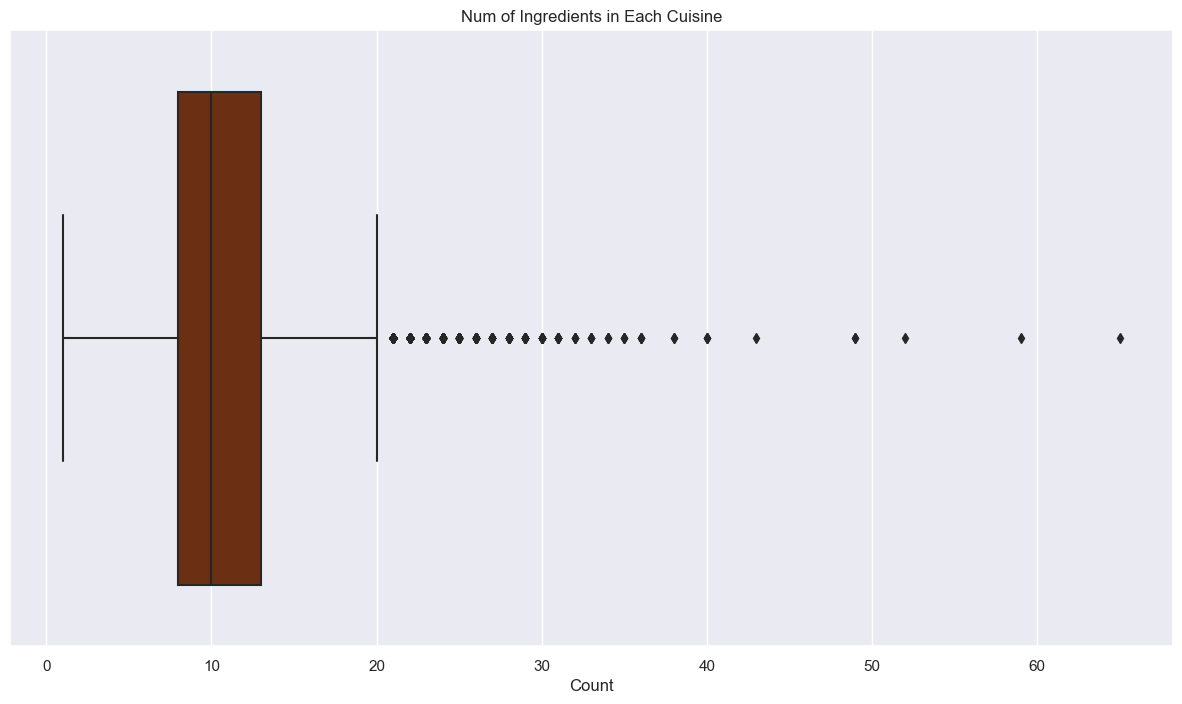

In [28]:
#Plot the num of ingredients in each cuisine
num_of_ingred = pd.Series(num_of_ingred_in_each_cuisine)
plt.figure(figsize=(15,8))

sb.boxplot(x=num_of_ingred, palette=np.array(pal))
plt.title('Num of Ingredients in Each Cuisine')
plt.xlabel('Count', fontsize=12)

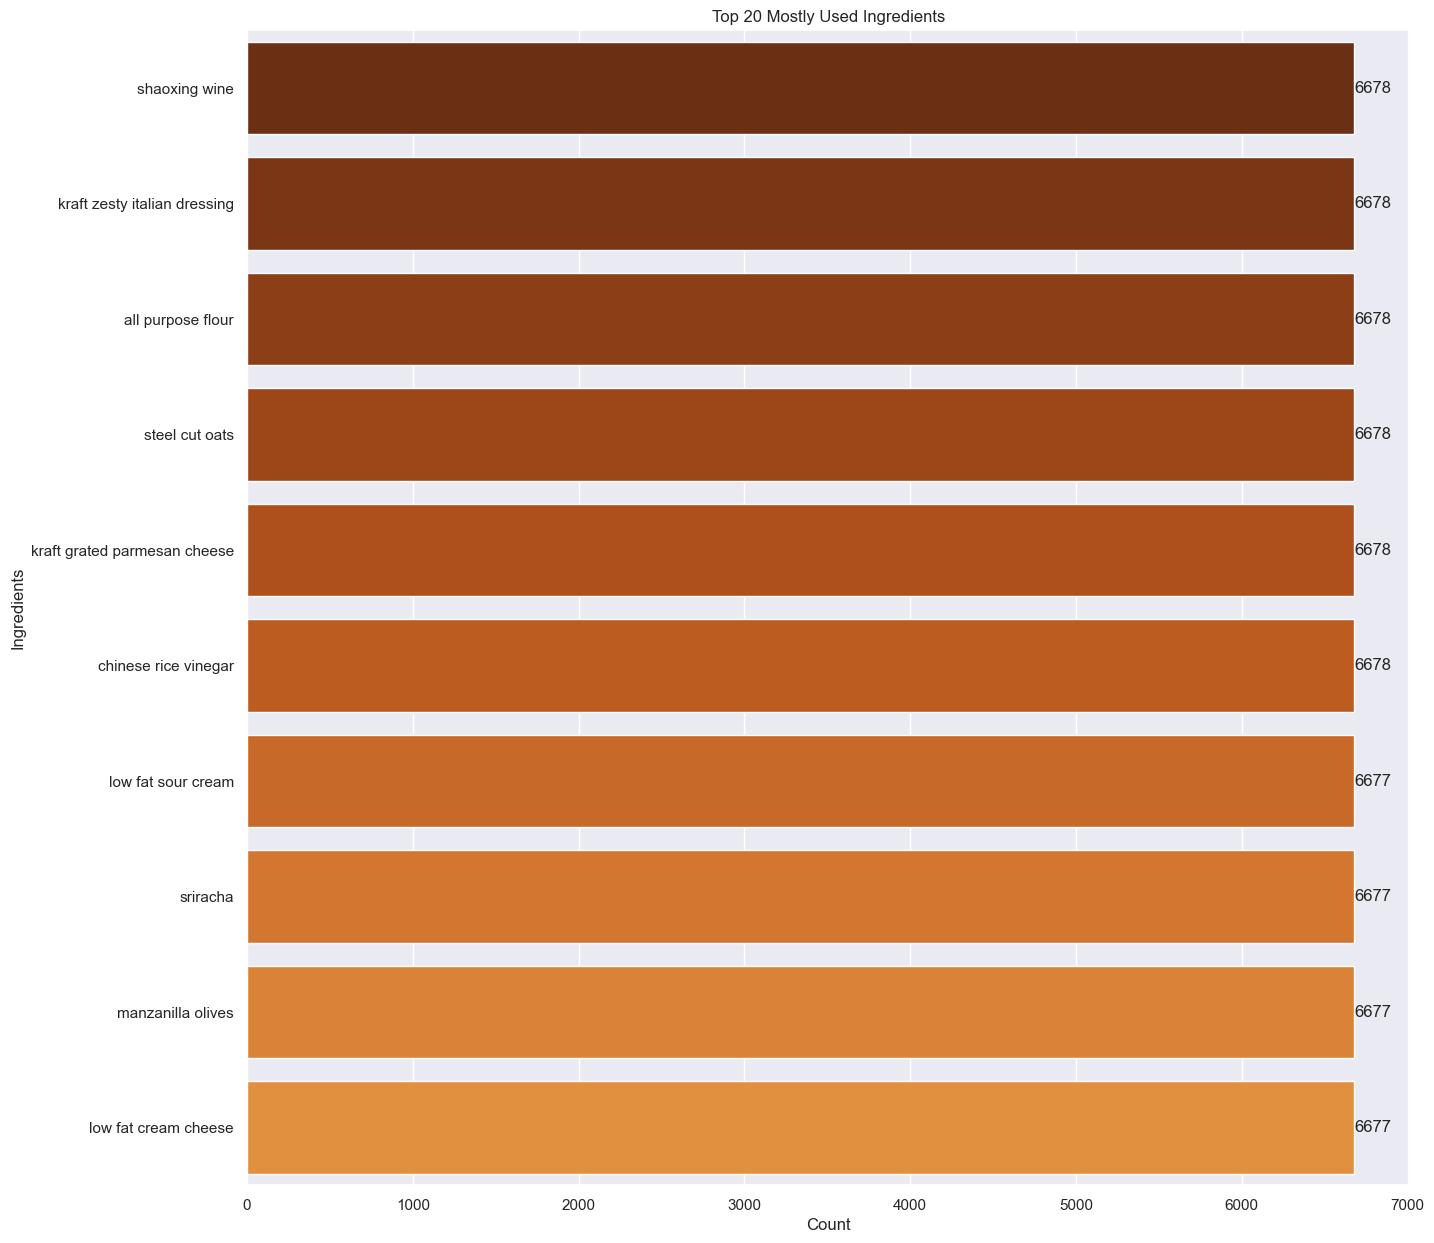

In [29]:
#Plot the top 10 mostly used ingredients
count_ingredients = pd.Series(ingredients_trainCount)
#print(count_ingredients.sort_values(ascending=False).head(10))

ingredients_barplot = count_ingredients.sort_values(ascending=False).head(10)
plt.figure(figsize=(15,15))

ax = sb.barplot(y = ingredients_barplot.index, x = ingredients_barplot.values, palette=np.array(pal))
ax.bar_label(ax.containers[0]) #show values on the graph

plt.title('Top 20 Mostly Used Ingredients')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Ingredients', fontsize=12)
plt.show()

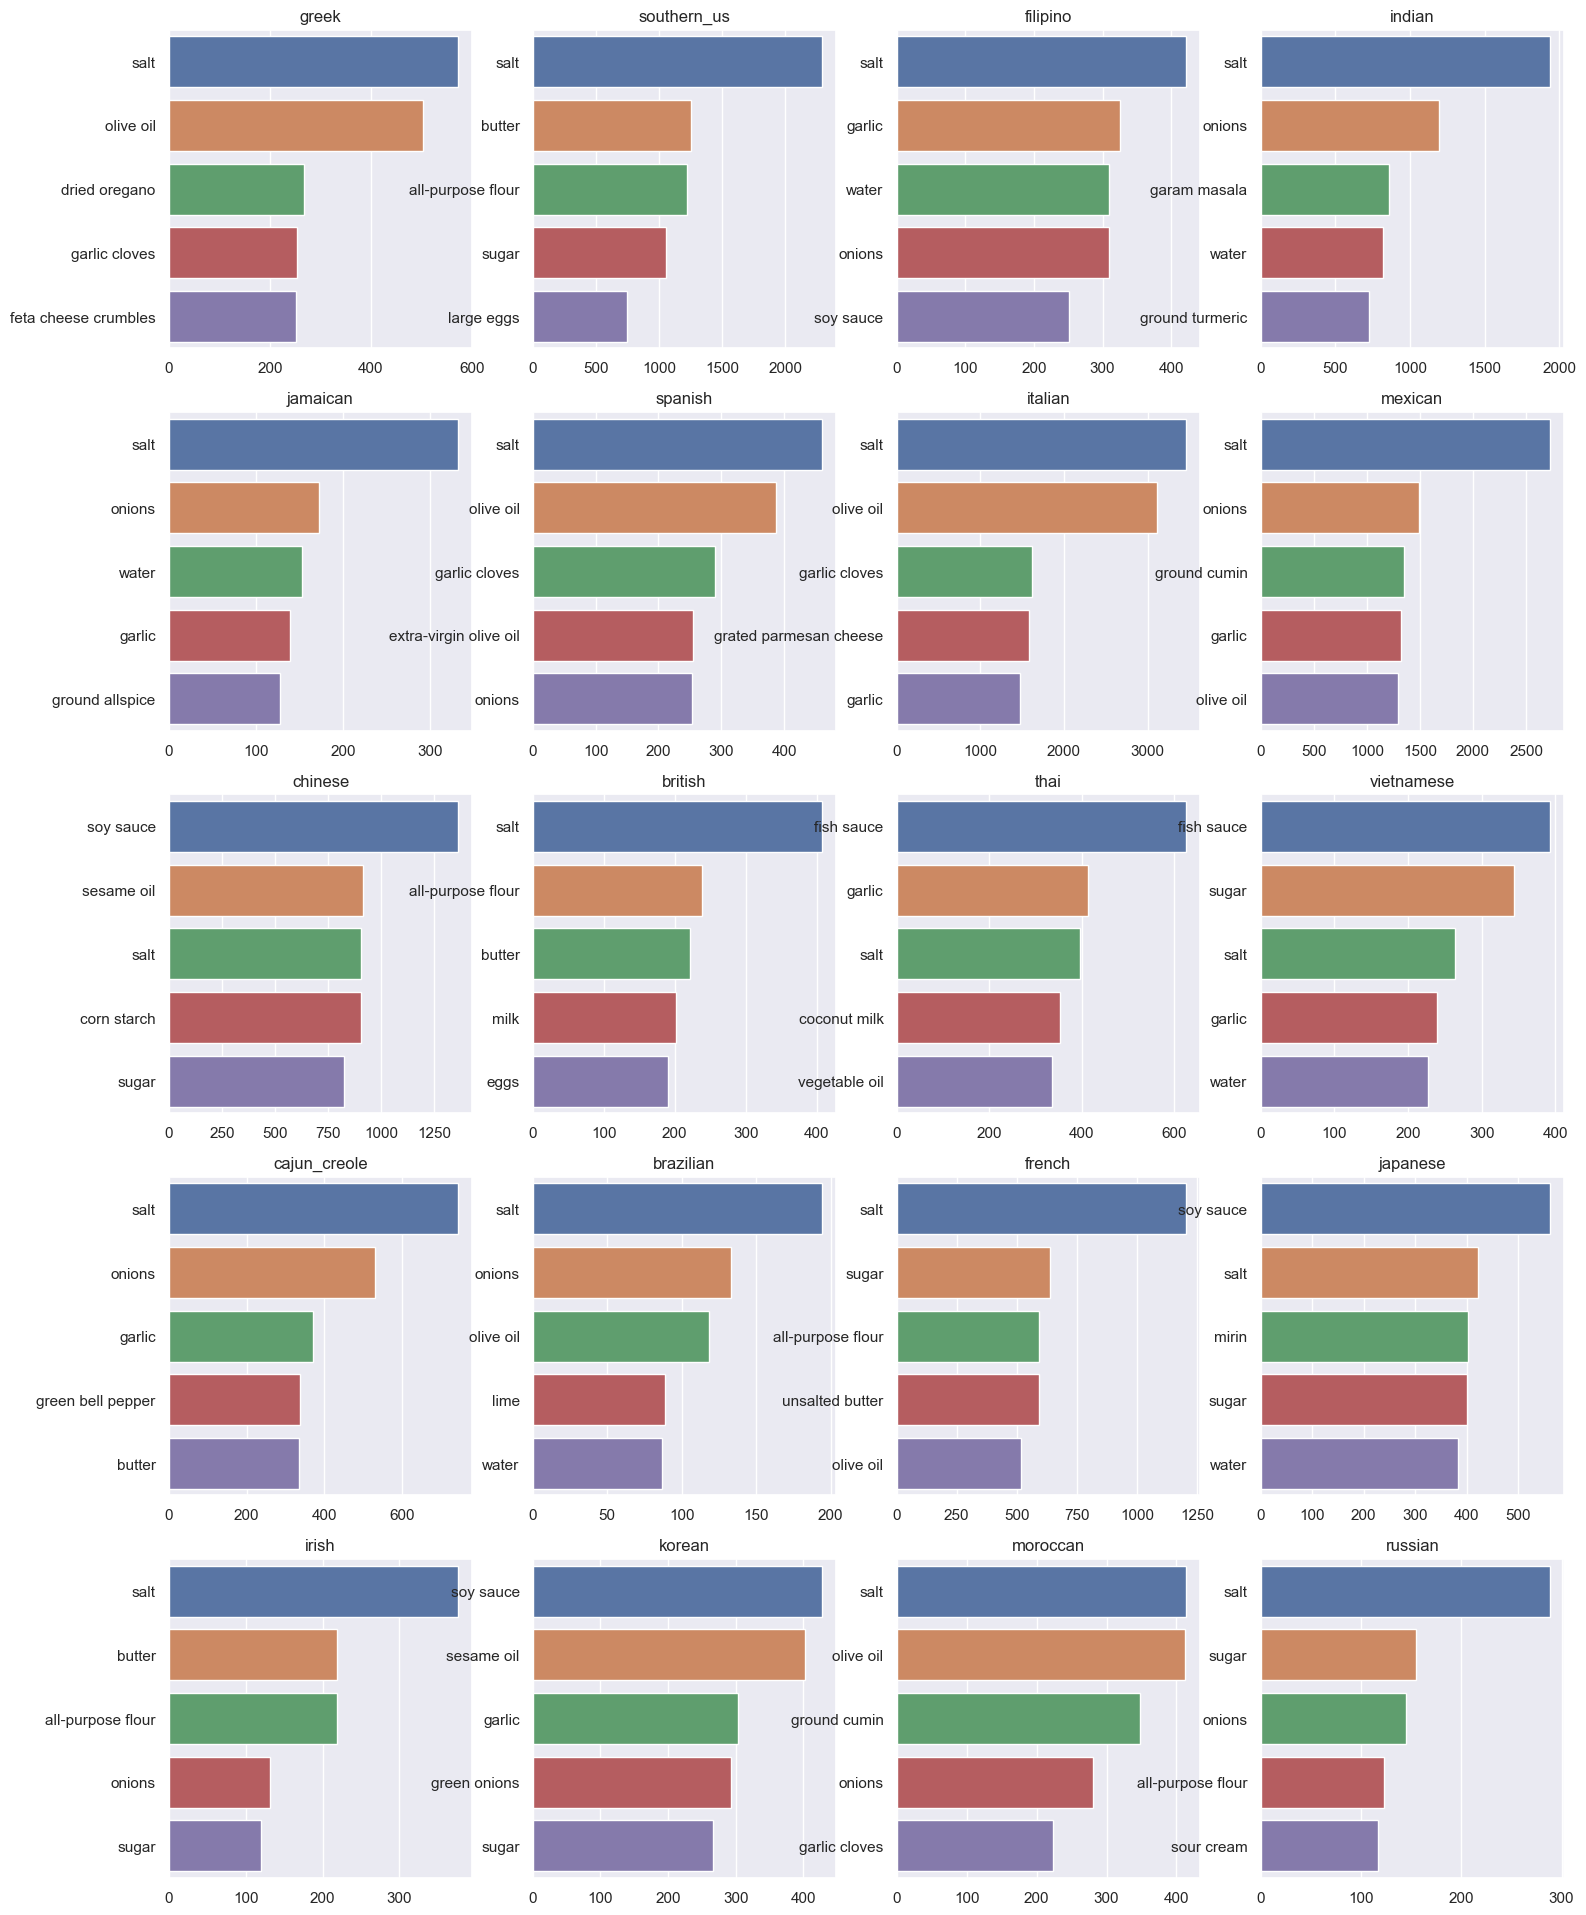

In [30]:
#Plot the top 10 ingredients needed for each cuisine

# Set up matplotlib figure with 20 subplots
f, axes = plt.subplots(5, 4, figsize=(18, 24))
#f.suptitle('Top 5 Ingredients for Each Cuisine')

xcount = 0
ycount = 0

cuisines = cooking_trainData['cuisine'].unique()

for i in cuisines:
    each_ingredients = []
    
    for j in cooking_trainData[cooking_trainData['cuisine']==i]['ingredients']:        
        for k in j:
            each_ingredients.append(k)    
    
    ingredients = pd.Series(each_ingredients)    
    c_ingredients = ingredients.value_counts(sort=True).head(5)      
    
    sb.barplot(y = c_ingredients.index, x = c_ingredients.values, ax=axes[xcount, ycount])
    axes[xcount, ycount].set_title(i)      

    if(ycount < 3):
        ycount = ycount + 1             
    else:
        xcount = xcount + 1
        ycount = 0                     

# Find those that are in test dataset but not in train dataset

In [31]:
cooking_testData = pd.read_json('E:/test/test.json')

ingred_not_in_trainDS = []

# for i in range(len(ingredients_trainCount)):
#     for j in cooking_testData['ingredients'][i]:
for i,ingredients in enumerate(cooking_testData['ingredients']):
    for ingred in ingredients:
        cleanJ = preprocess(ingred)
        if cleanJ not in ingredients_trainCount:
            ingred_not_in_trainDS.append(ingred)
            
   
print("Ingred that are not in the training data: ", len(ingred_not_in_trainDS)) 

ingred_not_in_trainDS

Ingred that are not in the training data:  469


['Grey Poupon Dijon Mustard',
 'chicken seasoning mix',
 'japanese greens',
 'krachai',
 'Nu-Salt Salt Substitute',
 'pork steaks',
 'stir fry noodles',
 'bluefish',
 'reduced fat reduced sodium condensed cream of chicken soup',
 'rapini',
 'nonfat thousand island dressing',
 'tri color pasta twists, cooked and drained',
 'spring chicken',
 'rouget',
 'dress russian',
 'elderflower syrup',
 'Daisy Brand Light Sour Cream',
 'pomegranate syrup',
 'vegetable base',
 'medium grain brown rice',
 'knorr shrimp flavor bouillon cube',
 'multigrain bread',
 'fresh',
 'american long grain rice',
 'potato sticks',
 'shanghai-style noodles',
 'celery cabbage',
 "moscato d'asti",
 'frozen cranberries',
 'horse gram',
 'white lentils',
 'Holland House White Cooking Wine',
 'cracked peppercorn',
 'TACO BELL® Thick & Chunky Medium Salsa',
 'beef strips',
 'cooked cut green beans',
 'wish-bone deluxe french dressing',
 'Silk Original Soymilk',
 'unsalted creamy peanut butter',
 'fresh ham butt',
 'cupc

In [16]:
def preprocess_clean(ingredients):
  #Converting to lowercase
  ingredients = [[x.lower() for x in y] for y in ingredients]

  #Removing extra white spaces
  ingredients = [[re.sub( '\s+', ' ', x).strip() for x in y] for y in ingredients]

  #Removing numbers
  ingredients = [[re.sub("\d+", "", x) for x in y] for y in ingredients]

  #Removing punctuation and special characters
  ingredients = [[x.replace("-", " ") for x in y] for y in ingredients] 
  ingredients = [[x.replace("&", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("'", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("''", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("%", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("!", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("(", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace(")", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("/", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace("/", "") for x in y] for y in ingredients] 
  ingredients = [[x.replace(".", "") for x in y] for y in ingredients] 
  ingredients = [[re.sub(r'[^\w\s]', '', x) for x in y] for y in ingredients]

  #Removing units of measurement
  units_list = ['g', 'lb', 's', 'n','oz']
  def remove_units(word):
    s = word.split()
    resw  = [word for word in s if word.lower() not in units_list]
        
    return ' '.join(resw)

  ingredients =  [[remove_units(x) for x in y] for y in ingredients]

  #Removing words which are not ingredients
  ingredients = [[re.sub(r'crushed|crumbles|ground|minced|powder|chopped|sliced', '', x) for x in y] for y in ingredients]

  return ingredients

In [17]:
train_data = preprocess_clean(cooking_trainData["ingredients"])
test_data = preprocess_clean(cooking_testData["ingredients"])

## Data pre-processing
ingredients variable are in text format,we need to vectorize the string first.To vectorize the string, there are two possibilities: we could just cast the label list as an integer tensor, or we could use a "one-hot" encoding. One-hot encoding is a widely used format for categorical data, also called "categorical encoding".
For this project,  we one-hot-encode ingredient, for label we integer-encode it. And parameter 'id' is not used in predicting the class because it does not help in predicting 



In [18]:
def get_dict_from_ingred_arr(ingred_arr): #output a dictionary to lookup for the index of ingredients
    ingred_dict = {}
    for i, ingredient in enumerate(ingred_arr):
        for ingred in ingredient:
            if ingred not in ingred_dict: #if ingredient doesnot exist
                ingred_dict[ingred] = len(ingred_dict) #add that ingredient and assign them a index
                
    return ingred_dict

def convert_ingred_arr_to_idx_lst(ingred_arr,ingred_arr_dict):#output index by lookup to dicionary
    ingred_idx_lst=[]
    for i, ingredient in enumerate(ingred_arr):
        temp_list=[]
        for ingred in ingredient:
            temp_list.append(ingred_arr_dict[ingred])
        ingred_idx_lst.append(temp_list)   
        
    return ingred_idx_lst

ingrad_dict=get_dict_from_ingred_arr(train_data)
train_ingrad_idx_lst=convert_ingred_arr_to_idx_lst(train_data,ingrad_dict)
no_ingredient=len(ingrad_dict)
train_ingrad_idx_lst #you can observe what we get here   39700x6700  1 for ingredient 0

[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [15, 4, 11, 20, 21, 22, 23, 24, 25, 26, 27, 28],
 [29, 19, 30, 11],
 [31,
  32,
  33,
  34,
  35,
  36,
  18,
  27,
  11,
  37,
  29,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [9, 47, 27, 15, 48, 11, 49, 18, 50, 51, 52, 53],
 [54, 11, 55, 4, 3, 56, 57, 58, 59, 60, 61, 46, 62],
 [47, 63, 64, 65, 50, 54, 66, 15, 53, 67],
 [54, 5, 68, 69, 70, 71, 72, 13, 11, 73, 74, 57, 75],
 [76, 77, 3, 78, 79, 58],
 [80, 81, 82, 54, 3, 83, 4, 84, 85, 86, 87, 1, 88],
 [89, 90, 91, 92, 93, 94, 95, 86, 47, 96, 3, 97, 29, 98, 99],
 [100, 101, 102, 78, 103, 104, 105, 106, 107, 58],
 [49, 108, 38, 109, 79, 13, 3, 110, 111, 112, 113, 11, 41, 31, 54, 98, 35],
 [114, 27, 115, 116, 117, 118, 13, 119, 120, 121, 122, 11],
 [123, 124, 12, 43, 125, 126, 127, 35, 128, 129],
 [130, 131, 132, 133],
 [134, 135, 20, 136],
 [47, 137, 138, 112],
 [26, 19, 139, 140, 141, 142, 143, 144, 11, 145, 146, 147, 99],
 [148, 149, 75, 150, 151, 

## One-hot-encode


We cannot feed arrays of integers into a model yet. 
We could one-hot-encode our arrays to turn them into vectors of 0s and 1s.this would mean for instance turning the array [15, 4, 11, 20, 21, 22, 23, 24, 25, 26, 27, 28] into a 6654-dimensional vector that would be all-zeros except for indices 15, 4, 11, 20, 21, 22, 23, 24, 25, 26, 27, 28.

In [19]:
def vectorize_sequences(sequences, dimension=no_ingredient):
    results = np.zeros((len(sequences), dimension)) #create a 2d all 0 array (dim=39774x6714) 
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results

x_train = vectorize_sequences(train_ingrad_idx_lst,no_ingredient)
x_train[1][1:100]#you can observe what we get here for cusine 1 and its ingredients indices. 

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Step 3 have finished the data preparation for x_train,now deal with label(cuisine)

Step 4:We label encode our label

In [20]:
def get_cusine_dict(cusine_arr):
    cusine_dict = {}
    for cusine in cusine_arr:
        if cusine not in cusine_dict:
            cusine_dict[cusine] = len(cusine_dict)
    return cusine_dict

def get_cusine_idx(cusine_arr):
    cusine_dict = {}
    for cusine in cusine_arr:
        if cusine not in cusine_dict:
            cusine_dict[cusine] = len(cusine_dict)
    return cusine_dict

def convert_cusine_arr_to_idx_lst(cusine_arr,cusine_dict):
    cusine_idx_lst=[]
    for cusine in cusine_arr:
        cusine_idx_lst.append(cusine_dict[cusine])

    return cusine_idx_lst

train_label=cooking_trainData['cuisine'].to_numpy()  
label_dict=get_cusine_dict(train_label)
print(label_dict)
no_label=len(label_dict)
print("No of label(cusine):",no_label)
y_label=convert_cusine_arr_to_idx_lst(train_label,label_dict)
print(y_label) #array of the index integer label

{'greek': 0, 'southern_us': 1, 'filipino': 2, 'indian': 3, 'jamaican': 4, 'spanish': 5, 'italian': 6, 'mexican': 7, 'chinese': 8, 'british': 9, 'thai': 10, 'vietnamese': 11, 'cajun_creole': 12, 'brazilian': 13, 'french': 14, 'japanese': 15, 'irish': 16, 'korean': 17, 'moroccan': 18, 'russian': 19}
No of label(cusine): 20
[0, 1, 2, 3, 3, 4, 5, 6, 7, 6, 6, 8, 6, 7, 6, 3, 9, 6, 10, 11, 10, 7, 1, 8, 6, 8, 12, 6, 8, 7, 6, 12, 7, 10, 6, 12, 6, 2, 1, 1, 6, 13, 7, 3, 7, 8, 14, 1, 1, 1, 15, 1, 6, 1, 6, 4, 15, 3, 6, 16, 10, 10, 3, 4, 6, 10, 17, 14, 14, 1, 5, 3, 18, 6, 6, 18, 18, 11, 15, 7, 12, 1, 14, 3, 3, 6, 6, 3, 17, 5, 6, 1, 1, 0, 7, 7, 1, 3, 6, 6, 6, 15, 6, 0, 17, 3, 7, 1, 16, 17, 8, 7, 1, 8, 18, 16, 8, 16, 7, 6, 6, 6, 4, 7, 15, 5, 8, 7, 9, 3, 10, 1, 7, 5, 14, 6, 3, 9, 5, 6, 17, 3, 7, 7, 1, 14, 12, 3, 8, 6, 6, 6, 1, 0, 15, 12, 6, 17, 7, 3, 6, 7, 17, 8, 14, 8, 5, 8, 5, 15, 7, 14, 15, 7, 6, 2, 1, 6, 6, 8, 7, 3, 17, 7, 7, 15, 0, 7, 1, 8, 9, 15, 6, 7, 16, 0, 12, 15, 6, 1, 1, 1, 6, 3, 8, 15, 7, 7

## Probabilistic classification model based on Bernoulli Navie Bayes

In [21]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import BernoulliNB
model_BernoulliNB = BernoulliNB()
model_BernoulliNB.fit(x_train, y_label)

BernoulliNB()

In [22]:
model_BernoulliNB.score(x_train, y_label)#training data accuracy

0.7431739327198672

In [23]:
cooking_testData["ingredients"]
test_dict=get_dict_from_ingred_arr(test_data)
ingred_traindata_doesnot_exist_lst=[]
test_ingred_idx_lst=[]
for i, ingredient in enumerate(test_data):
        temp_list=[]
        for ingred in ingredient:
            if ingred in ingrad_dict:
                temp_list.append(ingrad_dict[ingred])
    #         print(i,ingred,ingred_arr_dict[ingred])
        test_ingred_idx_lst.append(temp_list) 
x_test=vectorize_sequences(test_ingred_idx_lst)
x_test[0][0:100] #now we have one-hot-encode our test data

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
y_test_predict_BernoulliNB=model_BernoulliNB.predict(x_test)

In [25]:
test_label=[]
for i in (y_test_predict_BernoulliNB):      
    test_label.append((list(label_dict)[i]))#decode the label to using the dictinoary 

In [26]:
from pathlib import Path
def generateCSV(file_name,test_label):
    prediction_df = pd.concat([cooking_testData["id"], pd.DataFrame(test_label)], axis=1)
    prediction_df = prediction_df.rename(columns={0: "cuisine"})
    filepath = Path(file_name)  
    filepath.parent.mkdir(parents=True, exist_ok=True)
    prediction_df.to_csv(filepath)  
file_name='C:/Users/xjlgg/OneDrive/Desktop/DSAI/IE0005_MiniProject-main/Source/BernoulliNB_result.csv'
generateCSV(file_name,test_label)

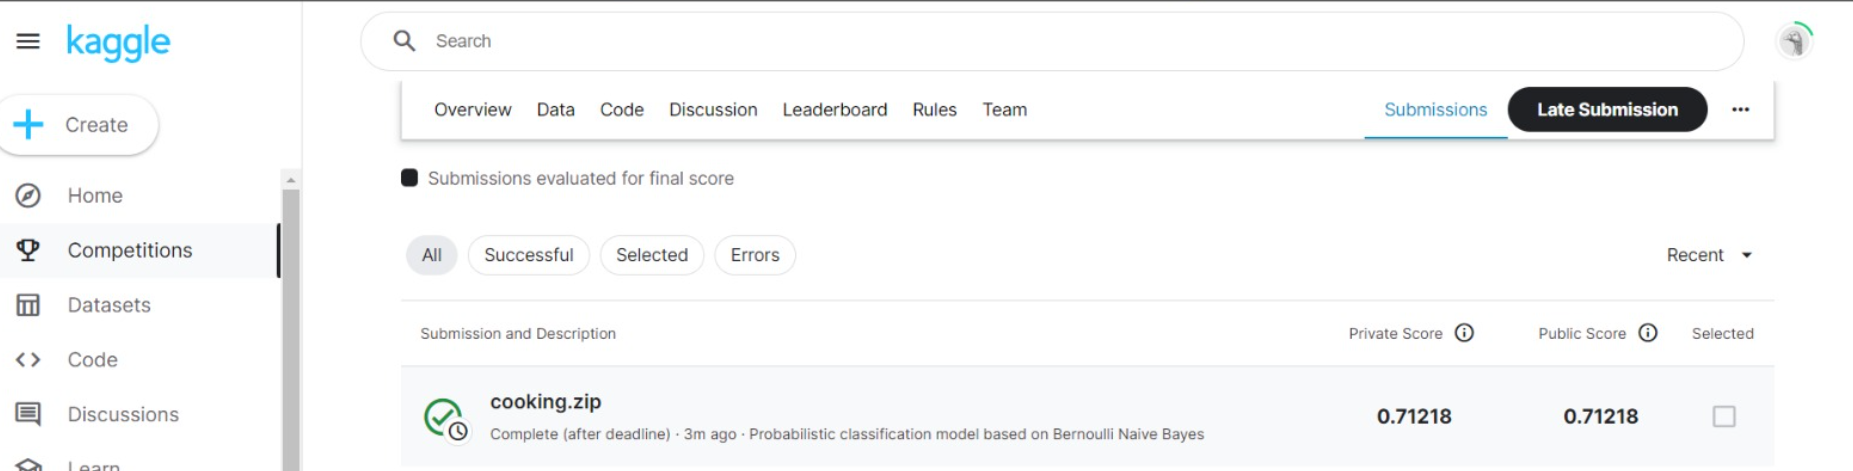

## XGBoost model




In [27]:
import xgboost as xgb
model_xgboost = xgb.XGBClassifier(objective="multi:softmax", 
                          num_class=20,
                          max_depth=6,
                          min_child_weight=1,
                          n_estimators=100,
                          learning_rate=0.1)

print('Fitting model...')
model_xgboost.fit(x_train,y_label)# i7-12700k CPU (20cores,4.9ghz per core)takes 10 mins to run 
print('Fitting done!')

In [28]:
y_test_predict_xgboost=model_xgboost.predict(x_test)
test_label_xgboost=[]
for i in (y_test_predict_xgboost):      
    test_label_xgboost.append((list(label_dict)[i]))#decode the label to using the dictinoary 
file_name='C:/Users/xjlgg/OneDrive/Desktop/DSAI/IE0005_MiniProject-main/Source/xgboost_result.csv'
generateCSV(file_name,test_label_xgboost)

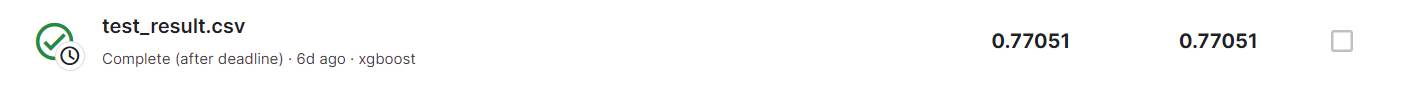

## Deep learning Model

In [29]:
import tensorflow as tf
import keras

In [30]:
def to_one_hot(labels, dimension=no_label):#one_hot the label for this model
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_label_onehot = to_one_hot(y_label)
print(y_label_onehot.shape)
#dimension of the one hot label is 39774x20  20 is the total number of cuisine
y_label_onehot

(39774, 20)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_label_onehot = y_label_onehot[indices]#prevent bias

In [32]:
from keras import models
from keras import layers
from keras.layers import Flatten, Dense
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import  PReLU
from keras.models import Sequential
from keras.layers import Embedding
from keras.initializers import Constant
from keras.layers import Embedding, SimpleRNN
model = models.Sequential()

model.add(layers.Dense(64,input_shape=(no_ingredient,)))

model.add(PReLU(alpha_initializer=Constant(value=0.125)))
model.add(Dropout(0.5))


#network should end with a softmax activation,
#so that it will output a probability distribution over the 20 output classes.
model.add(layers.Dense(20, activation='softmax'))  
model.compile('rmsprop', #"adam" 'rmsprop' ,'SGD' 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
history = model.fit(x_train,
                    y_label_onehot,
                    epochs=50,
                    batch_size=512,
                    validation_split=0.2)#we will use 20% of the data to validate our model
                                         #to do fine tuning, once we decide our parameter
                                         #and get the optimal no of epoch
                                         #we can delete the line'validation_split=0.2'
                                         #to train all the training data,after trial and errors,
                                         #we get optimal epoch=16,after 16 the model start overfitting

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                425920    
                                                                 
 p_re_lu (PReLU)             (None, 64)                64        
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
Total params: 427,284
Trainable params: 427,284
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
63/63 [==============================] - 1s 7ms/step - loss: 2.2786 - accuracy: 0.4598 - val_loss: 1.7625 - val_accuracy: 0.5867
Epoch 2/50
63/63 [========================

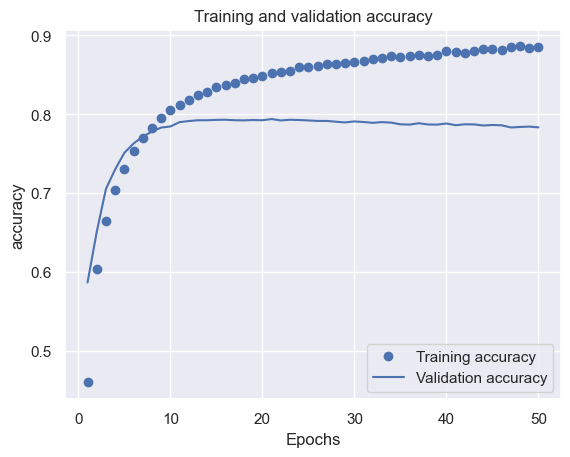

In [33]:
import matplotlib.pyplot as plt   #plot the graph, we can observe the point that validation acc stop dropping

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [36]:
model_FC = models.Sequential()

model_FC.add(layers.Dense(64,input_shape=(no_ingredient,)))

model_FC.add(PReLU(alpha_initializer=Constant(value=0.125)))
model_FC.add(Dropout(0.5))


#network should end with a softmax activation,
#so that it will output a probability distribution over the 20 output classes.
model_FC.add(layers.Dense(20, activation='softmax'))  
model_FC.compile('rmsprop', #"adam" 'rmsprop' ,'SGD' 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_FC.summary()
history = model_FC.fit(x_train,
                    y_label_onehot,
                    epochs=16,
                    batch_size=512)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                425920    
                                                                 
 p_re_lu_2 (PReLU)           (None, 64)                64        
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 20)                1300      
                                                                 
Total params: 427,284
Trainable params: 427,284
Non-trainable params: 0
_________________________________________________________________
Epoch 1/16
78/78 [==============================] - 0s 3ms/step - loss: 2.1776 - accuracy: 0.5042
Epoch 2/16
78/78 [==============================] - 0s 3ms/step - loss: 1.4511 - a

In [37]:
y_test_predict_FC=model_FC.predict(x_test)

311/311 [==============================] - 0s 887us/step


In [42]:
test_label_FC=[]
for i, Probabilities in enumerate(y_test_predict_FC):
    maxP=np.max(Probabilities)
    max_indice=np.where(Probabilities == maxP)[0][0]       
    test_label_FC.append((list(label_dict)[max_indice]))
        
test_label_FC
file_name='C:/Users/xjlgg/OneDrive/Desktop/DSAI/IE0005_MiniProject-main/Source/FCDL_result.csv'
generateCSV(file_name,test_label_FC)# highest score we get from this model is 79.8%

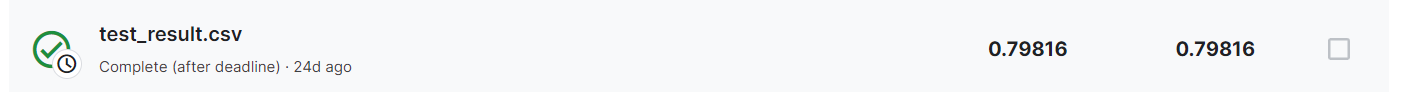